<a href="https://colab.research.google.com/github/QFrankQ/Applied-Numerical-Optimization/blob/main/Sparse_Recovery_and_Proximal_Gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sparse Recovery**#
To help you better understand constrained optimization and proximal methods, we will look at the problem of sparse recovery in signal processing. The overall problem that we are solving is to recover the signal $\mathbf{x}$ from noisy measurements $\mathbf{y}$ through a linear system $\mathbf{A}$, given by
\begin{align*}
\underset{\mathbf{x}}{\text{minimize}} \quad \quad  \frac{1}{2}\| \mathbf{y} - \mathbf{A} \mathbf{x}\|_2^2 + \lambda \| \mathbf{x} \|_1.
\end{align*} 


**Step 1**: You already have the gradient descent algorithm (this time, we will use the constant stepsize version from PA1). Now modify it into the proximal gradient algorithm. It should have the following format:


In [ ]:
import math
import numpy as np

def prox_gd(f,fp,prox,y,A,lam,x_init,ss,maxit,tol):
    # f is the total objective
    # fp is the gradient for the differentiable part
    # prox is the proximal operator
    # lam is the regularization parameter
  it = 0
  change = math.inf
  x = x_init
  while maxit >= it and change > tol:
    x_change = - ss * fp(y, A, x)
    z = x + x_change
    new_x = prox(z, ss, lam)
    change = abs(f(y, A, new_x) - f(y, A, x)) / abs(f(y, A, x))
    it += 1
    x = new_x
  print(it)

  return x


The algorithmic details (convergence, parameter settings) are the same as that in PA1. 

*Answer the questions and discuss your findings here*


**Step 2:** Code the cost function, the gradient, and the proximal operators using the Python *lambda* tool. As a reminder, the proximal operator for the $\ell_1$-norm regularizer solves the following optimization problem
\begin{align*}
\underset{\mathbf{x}}{\text{minimize}} \quad \quad  \frac{1}{2t}\| \mathbf{z} - \mathbf{x}\|_2^2 + \lambda \| \mathbf{x} \|_1,
\end{align*} 
where $t$ is the stepsize you used for the gradient descent step on the differentiable part of the objective. 
Also code a version with the squared $\ell_2$-norm as the regularizer (replace $\| \mathbf{x} \|_1$ with $\frac{1}{2}\| \mathbf{x} \|_2^2$), i.e., ridge regression. 

In [ ]:
"""
  Add your code here
"""
 
l1_norm = lambda x: np.sum(np.abs(x)) 
f = lambda y, A, x: 1/2 * pow(np.linalg.norm(y - (A@x)), 2) # + lam * (l1_norm(x) - r)
fp = lambda y, A, x: A.T @ ((A @ x) - y)
prox_lasso = lambda z, ss, lam: np.array([(zi / abs(zi)) * max(abs(zi) - lam * ss, 0) for zi in z])
prox_ridge = lambda z, ss, lam: np.array([zi / (1 + lam*ss) for zi in z])

*Answer the questions and discuss your findings here*


**Step 3**: Generate data. Set *numpy*'s random seed to 0. Then, set $M=30$ and $N=100$ and generate the matrix of covariates $\textbf{A} \in \mathbb{R}^{M \times N}$, which has i.i.d. entries distributed as $\mathcal{N}(0,1)$. Now, generate the regression coefficient vector $\mathbf{x} \in \mathbb{R}^{N}$ using a different method: randomly select $5\%$ of its entries (read: a total of $5$) to be non-negative, and generate those entries from (continuous) $\text{Uniform}([1,2])$. Then, generate the observation vector $\textbf{y}$ by adding i.i.d. standard normal noise on each entry. 



In [ ]:
from numpy.random.mtrand import rand
"""
  Add your code here
"""
np.random.seed(30)
M= 30
N = 100
A = np.random.normal(0, 1, (M, N))
uniform = np.random.uniform(1, 2, 5)
rand_index = np.random.choice(N, 5, replace = False)
x = np.zeros(N)
for i in range(5):
  x[rand_index[i]] = uniform[i]
gtx = x
y = A @ x + np.random.normal(0, 1, M)

*Answer the questions and discuss your findings here*


So you see that the number of observations is less than the total number of regression coefficients, but more than the number of non-zero coefficients.

**Step 4**: Run your code. The algorithm parameters (*maxit* and *tol*) should be the same as that in PA1. Implement a constant stepsize using the Lipschitz constant that we derived in class.

**4.1)** What is the constant stepsize that you will use?

In [ ]:
"""
  Add your code here
"""
maxit = 10000
tol = 1e-15
#L = max(np.linalg.eig(A.T@A)[0]) #Lipshitz constant: largest sigular value of A.T @ A
L = np.linalg.norm(A.T@A, ord = 2)
ss = 1 / L
x_init = np.zeros(N)


*Answer the questions and discuss your findings here*

\begin{gather}
f(\mathbf{x}) = \frac{1}{2} \|\mathbf{y} - \mathbf{A}\mathbf{x}\|_2^2\\
f'(\mathbf{x}) = \mathbf{A}^T(\mathbf{Ax - y}) \\
f''(\mathbf{x}) = \mathbf{A^TA}
\end{gather}

The Hessian is $\mathbf{A^TA}$, taking the L2 norm of it gives us the largest singular value, which is the Lipschitz constant. 


**4.2**) For different values of $\lambda \in \{0, 0.5, 1, 3, 10, 20, 50, 100 \}$, plot the both original signal and the recovered signal using $\ell_1$- and $\ell_2$-norm regularizers. Summarize the trend and discuss your observations. \\

564
564
10001
260
10001
245
8254
228
925
179
323
144
200
92
1
62


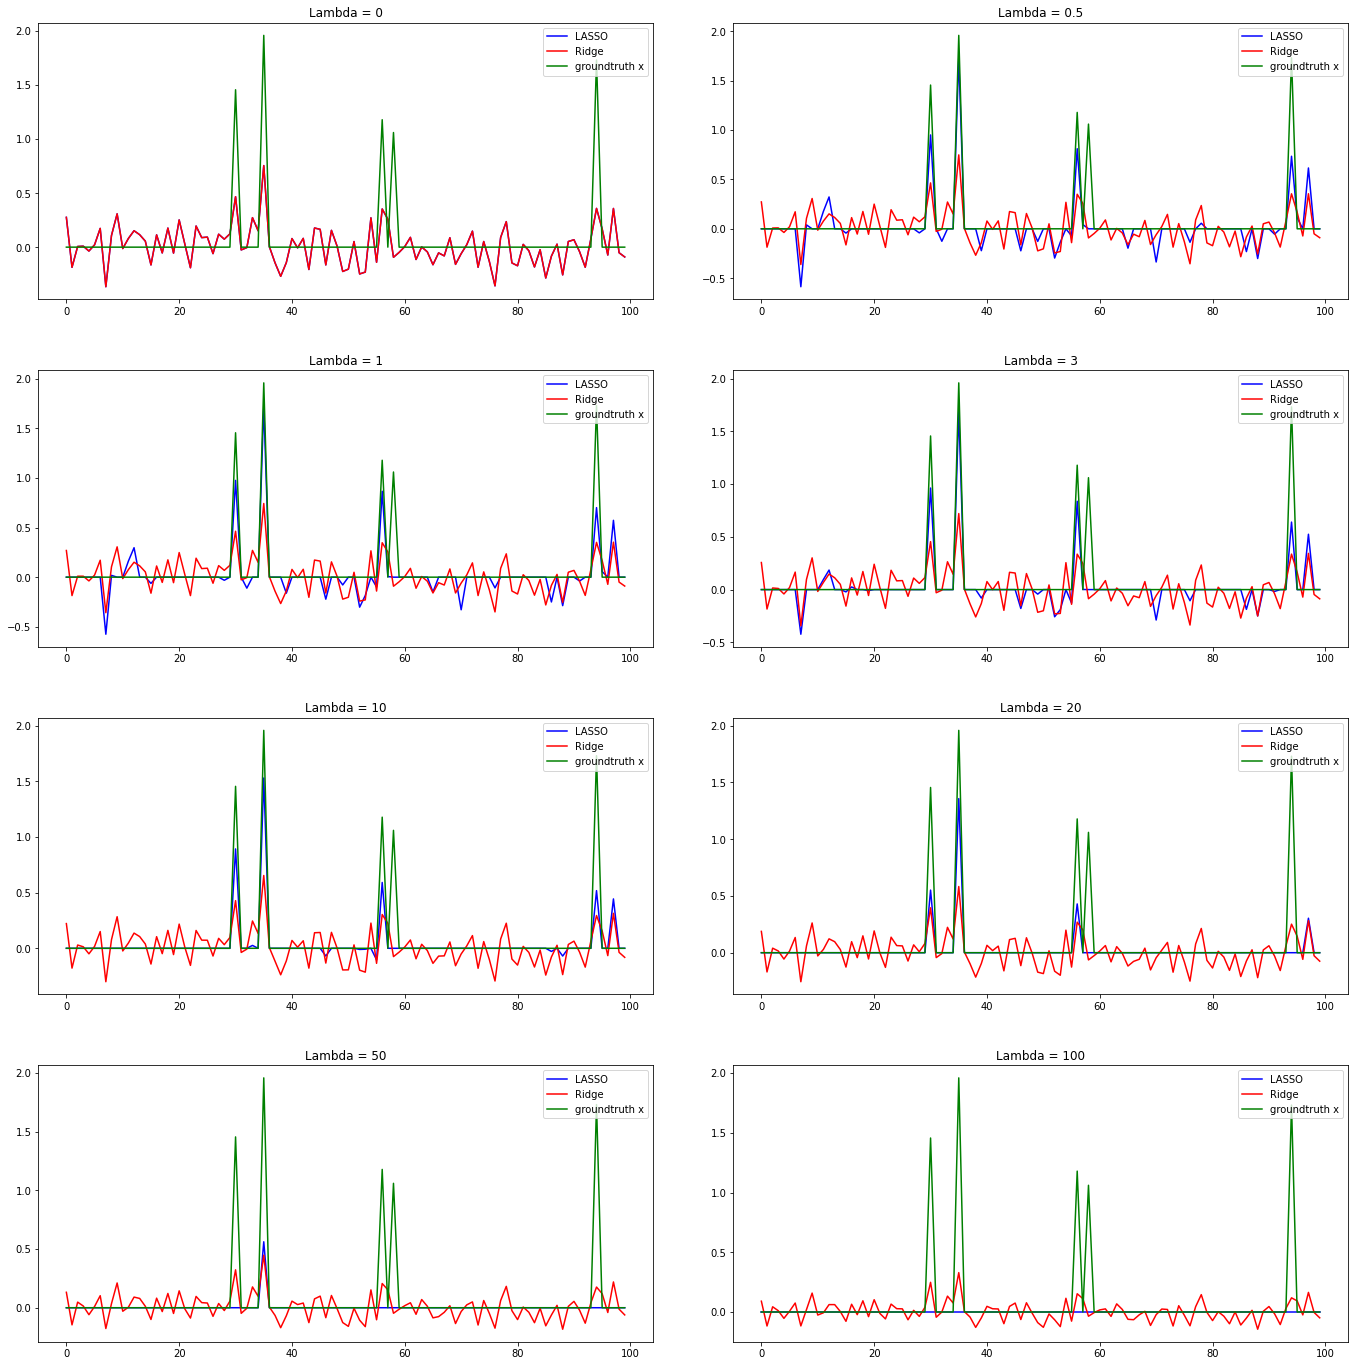

In [ ]:
"""
  Add your code here
"""
import matplotlib.pyplot as plt
proxs = [prox_lasso, prox_ridge]
lam = [0, 0.5, 1, 3, 10, 20, 50, 100]
prox = i
fig, axs = plt.subplots(4, 2, figsize = (20, 20))
fig.tight_layout(pad = 5.0)
k = 0
for i in range(4):
  for j in range(2):
    x1 = prox_gd(f,fp,prox_lasso,y,A,lam[k],x_init,ss,maxit,tol)
    x2 = prox_gd(f,fp,prox_ridge,y,A,lam[k],x_init,ss,maxit,tol)
    axs[i, j].plot(range(100), x1, 'b', label = 'LASSO')
    axs[i, j].plot(range(100), x2, 'r', label = 'Ridge')
    axs[i, j].plot(range(100), gtx, 'g', label = 'groundtruth x')
    axs[i, j].set_title(f'Lambda = {lam[k]}')
    leg = axs[i, j].legend(loc='upper right')
    k += 1
plt.show()



*Answer the questions and discuss your findings here*

As lambda gets bigger, the signal output from Lasso regression becomes a flat line, whereas the signal output from Ridge regression has more variance and spikes.

**4.3)** Visualize $\mathbf{x}$, both before and after the proximal operator, for several iterations. What does the proximal operator do? Show and discuss how it and the gradient step work together to finding a sparse solution to the problem. \\


8254


<function matplotlib.pyplot.show(*args, **kw)>

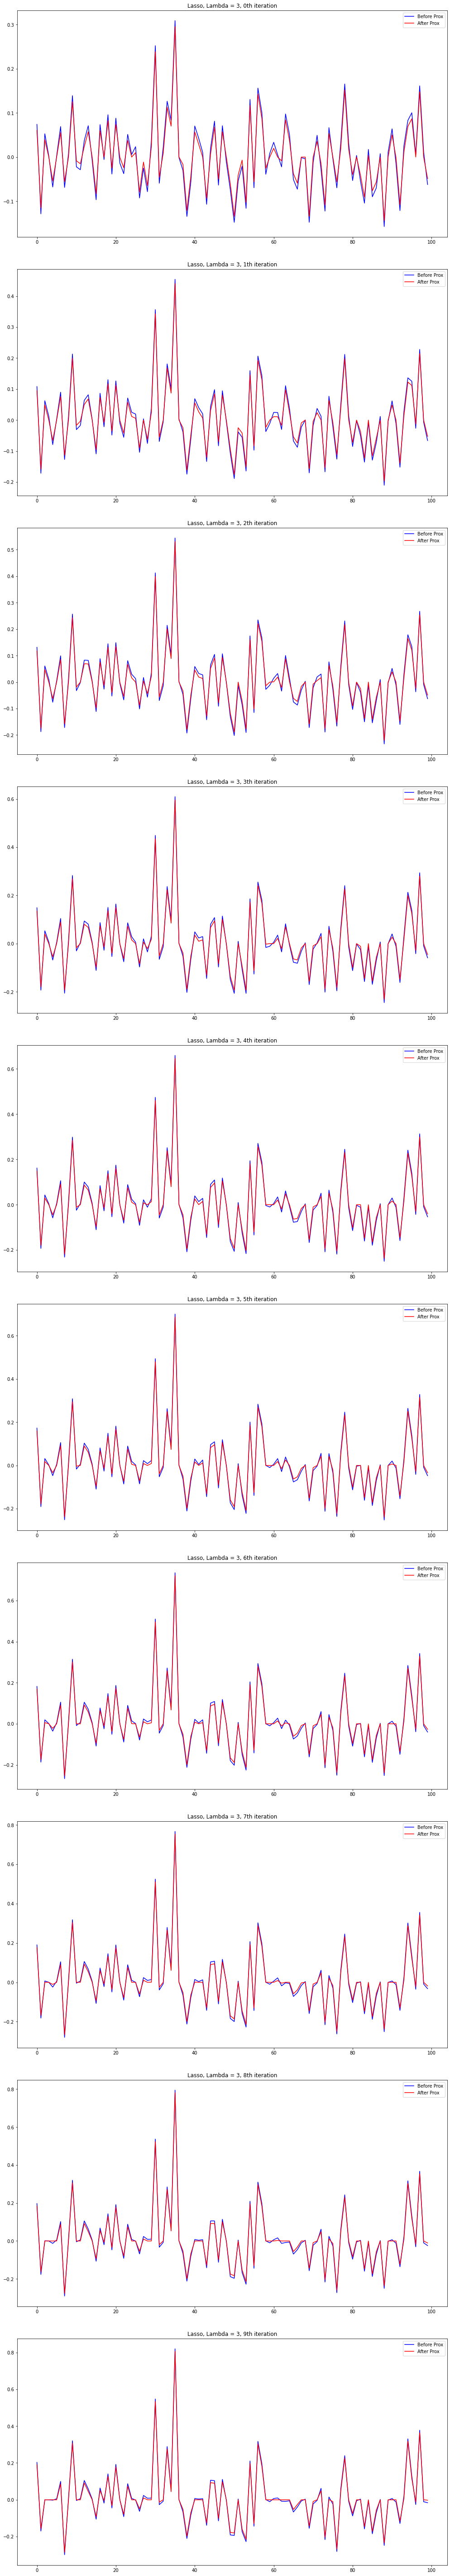

In [ ]:
"""
  Add your code here
"""
fig, axs = plt.subplots(10, figsize = (15, 80))
fig.tight_layout(pad = 5.0)
lam = 1
prox = prox_lasso
plt.show

lam = 3
maxit = 10000
tol = 1e-15
#L = max(np.linalg.eig(A.T@A)[0]) #Lipshitz constant: largest sigular value of A.T @ A [[eeee]]
L = np.linalg.norm(A.T@A, ord = 2)
ss = 1 / L
it = 0
change = math.inf
x = np.zeros(100)

k = 0
while 10000 > it and change > tol:
  x_change = - ss * fp(y, A, x)
  z = x + x_change
  if k < 10:
    axs[k].plot(range(100), z, 'b', label = 'Before Prox')
  new_x = prox(z, ss, lam)
  if k < 10:
    axs[k].plot(range(100), new_x, 'r', label = 'After Prox')
    #axs[k].plot(range(100), gtx, 'g', label = 'Ground truth x')
    axs[k].set_title(f'Lasso, Lambda = {lam}, {it}th iteration')
    #print(sum(np.abs(new_x -z)))
    #axs[k].plot(range(100), np.abs(new_x - z), 'r', label = 'Absolute difference between z, x')
    leg = axs[k].legend(loc='upper right')
    #print(f"x - z: {new_x-z}")
    k+=1
  change = abs(f(y, A, new_x) - f(y, A, x)) / abs(f(y, A, x))
  it += 1
  x = new_x
print(it)
plt.show



*Answer the questions and discuss your findings here*

The proximal operator pushes the value of signals back closer to 0 as the gradient descent step pushes the value of signals to the optimal value. The difference between x before and after the operator decreased as the number of iteration increased.


**4.4)** Keep the signal $\mathbf{x}$ fixed and change the number of observations as $M \in \{ 5, 10, 20, 30, 50, 100, 500\}$, and use both regularizers. Use a value of $\lambda$ that you found to be effective in part 2). What do you observe? Summarize and discuss.

In [ ]:
"""
  Add your code here
"""
fig, axs = plt.subplots(8, figsize = (15, 40))
fig.tight_layout(pad = 5.0)
M_list = [5, 10, 10, 20, 30, 50, 100, 500]
N = 100
lam = 3
tol = 1e-15
x_init = np.zeros(100)
change = math.inf
maxit = 10000
k = 0

for M in M_list:
  A = np.random.normal(0, 1, (M, N))
  y = A @ x + np.random.normal(0, 1, M)
  L = max(np.linalg.eig(A.T@A)[0]) #Lipshitz constant: largest sigular value of A.T @ A
  ss = 1 / L
  x1 = prox_gd(f,fp,prox_lasso,y,A,lam,x_init,ss,maxit,tol)
  x2 = prox_gd(f,fp,prox_ridge,y,A,lam,x_init,ss,maxit,tol)
  axs[k].plot(range(100), x1, 'b', label = 'LASSO')
  axs[k].plot(range(100), x2, 'r', label = 'Ridge')
  axs[k].plot(range(100), gtx, 'g', label = 'Ground truth x')
  axs[k].set_title(f'M = {M}, Lambda = {lam}')
  leg = axs[k].legend(loc='upper right')
  k += 1
  



1876
67


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


10001
80


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


10001
76


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


*Answer the questions and discuss your findings here*

As M gets bigger, there's less difference between the output from the Lasso method and the Ridge method.


#Add Colab link here: # https://colab.research.google.com/drive/1UXq23yZUOWk_viVtA5B3tB20dTE0MXUy?authuser=1#scrollTo=Mc5a2PfwiEoz